In [1]:
%matplotlib inline
#%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import pygmo as pg

import unicodedata

from runners.vStirapRunner import ExperimentalRunner, Atom4lvl, Cavity, CavityBiref, LaserCoupling, CavityCoupling

i = np.complex(0,1)

In [2]:
pi_str = unicodedata.lookup("GREEK SMALL LETTER PI")
Delta_str = unicodedata.lookup("GREEK CAPITAL LETTER DELTA")
kappa_str = unicodedata.lookup("GREEK SMALL LETTER KAPPA")

### 2D scans of $\kappa$ and $\Delta_P$

#### Macroscopic cavities - $g/2\pi = 3$MHz

In [3]:
g, gamma = [x*2*np.pi for x  in [3,3]]

atom4lvl = Atom4lvl(gamma=gamma, configured_states=['x','gP'])

cav = CavityBiref(g=g, kappa1=0, kappa2=0, R_CL=[[1,0],[0,1]], deltaP=0)

cavity_coupling = CavityCoupling(g0=cav.g,
                                 g='gP', x='x',
                                 deltaC = 0 * 2*np.pi,
                                 deltaM=[1,-1],
                                 couple_off_resonance=False)

In [61]:
psi0 = ['x',0,0]
t_length = 1
n_steps = 501

sp_em, n_ph = {},{}

deltaPs = np.arange(0,10,1)
kappas = np.arange(0,10,1)

for deltaP in deltaPs:
    print('\nSimulating for {0}/2{1}={2}'.format(Delta_str, pi_str, deltaP),end='\n\t')
    sp_em_temp, n_ph_temp = [], []
    print('{0}/2{1}='.format(kappa_str, pi_str), end='')
    for kappa in kappas:
        print(kappa, end='...')
        
        cav.kappa1 = kappa * 2 * np.pi
        cav.kappa2 = kappa * 2 * np.pi
        cav.deltaP = deltaP * 2 * np.pi
        
        runner = ExperimentalRunner(atom4lvl,cav,[],cavity_coupling,
                                    verbose=False, reconfigurable_decay_rates=True)
        results = runner.run(psi0, t_length, n_steps)
        
        sp_em_temp.append(results.get_total_spontaneous_emission())
        n_ph_temp.append(sum(results.get_total_cavity_emission(results.compiled_hamiltonian.atom.R_AL)))
        
    sp_em[deltaP] = [kappas, np.array(sp_em_temp)]
    n_ph[deltaP] = [kappas, np.array(n_ph_temp)]
print('\ndone.')


Simulating for Δ/2π=0
	κ/2π=0...

1...

2...

3...

4...

5...

6...

7...

8...

9...


Simulating for Δ/2π=1
	κ/2π=0...

1...

2...

3...

4...

5...

6...

7...

8...

9...


Simulating for Δ/2π=2
	κ/2π=0...

1...

2...

3...

4...

5...

6...

7...

8...

9...


Simulating for Δ/2π=3
	κ/2π=0...

1...

2...

3...

4...

5...

6...

7...

8...

9...


Simulating for Δ/2π=4
	κ/2π=0...

1...

2...

3...

4...

5...

6...

7...

8...

9...


Simulating for Δ/2π=5
	κ/2π=0...

1...

2...

3...

4...

5...

6...

7...

8...

9...


Simulating for Δ/2π=6
	κ/2π=0...

1...

2...

3...

4...

5...

6...

7...

8...

9...


Simulating for Δ/2π=7
	κ/2π=0...

1...

2...

3...

4...

5...

6...

7...

8...

9...


Simulating for Δ/2π=8
	κ/2π=0...

1...

2...

3...

4...

5...

6...

7...

8...

9...


Simulating for Δ/2π=9
	κ/2π=0...

1...

2...

3...

4...

5...

6...

7...

8...

9...


done.


In [82]:
def plot(deltaP=0):
        
    f, ((ax1,ax2)) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
    
    kappas, sp_0 = sp_em[0]
    kappas, n_0 = n_ph[0]
    
    l_sp, = ax1.plot(kappas, sp_0,  '--')
    l_n, =  ax1.plot(kappas, n_0,  '--')
    ax1.legend()
    
    kappas, sp = sp_em[deltaP]
    kappas, n = n_ph[deltaP]
    
    ax1.plot(kappas, sp, color=l_sp.get_color(), label = "Spont. emm.")
    ax1.plot(kappas, n, color=l_n.get_color(), label = "Cav. emm.")
    ax1.legend()
    
    l_FP, = ax2.plot(kappas, [n/(s+n) for s,n in zip(sp_0, n_0)], '--')
    ax2.plot(kappas, [n/(s+n) for s,n in zip(sp, n)], color=l_FP.get_color(), label = "Eff FP")
    ax2.plot(kappas, [2*g**2/(2*kappa*gamma) for kappa in [k*2*np.pi for k in kappas]], label = "2C")
    ax2.set_ylim([0,1])
    ax2.legend()
    
    ax2.set_xlabel('$\kappa/2\pi$')
        
    ax1.set_title('$\Delta_P/2\pi={}MHz$'.format(deltaP))

/anaconda3/envs/rb-cqed-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/anaconda3/envs/rb-cqed-env/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars


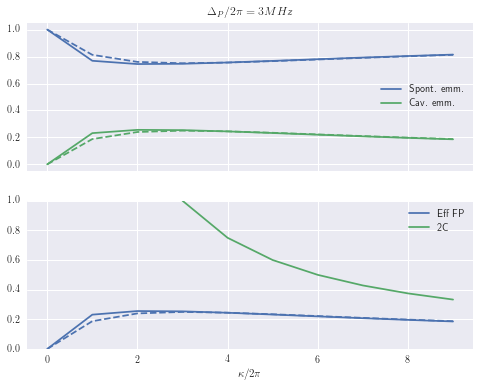

In [93]:
i=3
plot(deltaPs[i])

##### Initial observations

* There appears to be an optimum rate of cavity decay for photon extraction from an excited atom, even in the absence of birefringence.  Is this a trade-off between the field in the cavity building up and therefore stimualting more emission into the mode, vs the probability of the photon being reabsorbed prior to emission fro the cavity mode?
* We can do better with a birefringent cavity, both reaching higher peak extraction efficiencies and (importantly) reaching these peaks at lower cavity decay rates (which practically would allow more reflective mirrors and so stronger atom-cavity coupling).

#### Micron-scale cavities - $g/2\pi = 30$MHz

In [6]:
g, gamma = [x*2*np.pi for x  in [30,3]]

atom4lvl = Atom4lvl(gamma=gamma, configured_states=['x','gP'])

cav = CavityBiref(g=g, kappa1=0, kappa2=0, R_CL=[[1,0],[0,1]], deltaP=0)

cavity_coupling = CavityCoupling(g0=cav.g,
                                 g='gP', x='x',
                                 deltaC = 0 * 2*np.pi,
                                 deltaM=[1,-1],
                                 couple_off_resonance=False)

In [103]:
psi0 = ['x',0,0]
t_length = 1
n_steps = 501

sp_em, n_ph = {},{}

deltaPs = np.arange(0,100,5)
kappas = np.arange(0,100,5)

for deltaP in deltaPs:
    print('\nSimulating for {0}P/2{1}={2}'.format(Delta_str, pi_str, deltaP),end='\n\t')
    sp_em_temp, n_ph_temp = [], []
    print('{0}/2{1}='.format(kappa_str, pi_str), end='')
    for kappa in kappas:
        print(kappa, end='...')
        
        cav.kappa1 = kappa * 2 * np.pi
        cav.kappa2 = kappa * 2 * np.pi
        cav.deltaP = deltaP * 2 * np.pi
        
        runner = ExperimentalRunner(atom4lvl,cav,[],cavity_coupling,
                                    verbose=False, reconfigurable_decay_rates=True)
        results = runner.run(psi0, t_length, n_steps)
        
        sp_em_temp.append(results.get_total_spontaneous_emission())
        n_ph_temp.append(sum(results.get_total_cavity_emission(results.compiled_hamiltonian.atom.R_AL)))
        
    sp_em[deltaP] = [kappas, np.array(sp_em_temp)]
    n_ph[deltaP] = [kappas, np.array(n_ph_temp)]
print('\ndone.')


Simulating for ΔP/2π=0
	κ/2π=0...

5...10...

15...

20...

25...30...

35...

40...

45...

50...

55...

60...

65...

70...

75...

80...

85...

90...

95...


Simulating for ΔP/2π=5
	κ/2π=0...

5...

10...

15...20...

25...30...

35...40...

45...

50...

55...

60...

65...

70...

75...

80...

85...

90...

95...


Simulating for ΔP/2π=10
	κ/2π=0...

5...

10...

15...

20...25

...30...35

...40...

45...

50...

55...

60...

65...

70...

75...

80...

85...

90...

95...


Simulating for ΔP/2π=15
	κ/2π=0...

5...

10...

15...

20...

25...

30...35...

40...

45...

50...

55...

60...

65...

70...

75...

80...

85...

90...

95...


Simulating for ΔP/2π=20
	κ/2π=0...

5...

10...15...

20...

25...30

...35...

40...

45...

50...

55...

60...

65...

70...

75...

80...

85...

90...

95...


Simulating for ΔP/2π=25
	κ/2π=0...

5...

10...

15...

20...

25...

30...35...

40...

45...

50...

55...

60...

65...

70...

75...

80...

85...

90...

95...


Simulating for ΔP/2π=30
	κ/2π=0...

5...

10...

15...

20...

25...

30...

35...

40...

45...

50...

55...

60...

65...

70...

75...

80...

85...

90...

95...


Simulating for ΔP/2π=35
	κ/2π=0...

5...

10...

15...

20...25...

30...35

...40...

45...

50...

55...

60...

65...

70...

75...

80...

85...

90...

95...


Simulating for ΔP/2π=40
	κ/2π=0...

5...

10...

15...

20...25

...30...

35...

40...

45...

50...

55...

60...

65...

70...

75...

80...

85...

90...

95...


Simulating for ΔP/2π=45
	κ/2π=0...

5...

10...

15...

20...25...

30...

35...

40...

45...

50...

55...

60...

65...

70...

75...

80...

85...

90...

95...


Simulating for ΔP/2π=50
	κ/2π=0...

5...

10...

15...

20...

25...

30...

35...

40...

45...

50...

55...

60...

65...

70...

75...

80...

85...

90...

95...


Simulating for ΔP/2π=55
	κ/2π=0...

5...

10...

15...

20...

25...

30...

35...

40...

45...

50...

55...

60...

65...

70...

75...

80...

85...

90...

95...


Simulating for ΔP/2π=60
	κ/2π=0...

5...

10...

15...

20...

25...

30...

35...

40...

45...

50...

55...

60...

65...

70...

75...

80...

85...

90...

95...


Simulating for ΔP/2π=65
	κ/2π=0...

5...

10...

15...

20...

25...

30...

35...

40...

45...

50...

55...

60...

65...

70...

75...

80...

85...

90...

95...


Simulating for ΔP/2π=70
	κ/2π=0...

5...

10...

15...

20...

25...

30...

35...

40...

45...

50...

55...

60...

65...

70...

75...

80...

85...

90...

95...


Simulating for ΔP/2π=75
	κ/2π=0...

5...

10...

15...

20...

25...

30...

35...

40...

45...

50...

55...

60...

65...

70...

75...

80...

85...

90...

95...


Simulating for ΔP/2π=80
	κ/2π=0...

5...

10...

15...

20...

25...

30...

35...

40...

45...

50...

55...

60...

65...

70...

75...

80...

85...

90...

95...


Simulating for ΔP/2π=85
	κ/2π=0...

5...

10...

15...

20...

25...

30...

35...

40...

45...

50...

55...

60...

65...

70...

75...

80...

85...

90...

95...


Simulating for ΔP/2π=90
	κ/2π=0...

5...

10...

15...

20...

25...

30...

35...

40...

45...

50...

55...

60...

65...

70...

75...

80...

85...

90...

95...


Simulating for ΔP/2π=95
	κ/2π=0...

5...

10...

15...

20...

25...

30...

35...

40...

45...

50...

55...

60...

65...

70...

75...

80...

85...

90...

95...


done.


In [104]:
def plot(deltaP=0):
        
    f, ((ax1,ax2)) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
    
    kappas, sp_0 = sp_em[0]
    kappas, n_0 = n_ph[0]
    
    l_sp, = ax1.plot(kappas, sp_0,  '--')
    l_n, =  ax1.plot(kappas, n_0,  '--')
    ax1.legend()
    
    kappas, sp = sp_em[deltaP]
    kappas, n = n_ph[deltaP]
    
    ax1.plot(kappas, sp, color=l_sp.get_color(), label = "Spont. emm.")
    ax1.plot(kappas, n, color=l_n.get_color(), label = "Cav. emm.")
    ax1.legend()
    
    l_FP, = ax2.plot(kappas, [n/(s+n) for s,n in zip(sp_0, n_0)], '--')
    ax2.plot(kappas, [n/(s+n) for s,n in zip(sp, n)], color=l_FP.get_color(), label = "Eff FP")
    ax2.plot(kappas, [2*g**2/(2*kappa*gamma) for kappa in [k*2*np.pi for k in kappas]], label = "2C")
    ax2.set_ylim([0,1])
    ax2.legend()
    
    ax2.set_xlabel('$\kappa/2\pi$')
        
    ax1.set_title('$\Delta_P/2\pi={}MHz$'.format(deltaP))

/anaconda3/envs/rb-cqed-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/anaconda3/envs/rb-cqed-env/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars


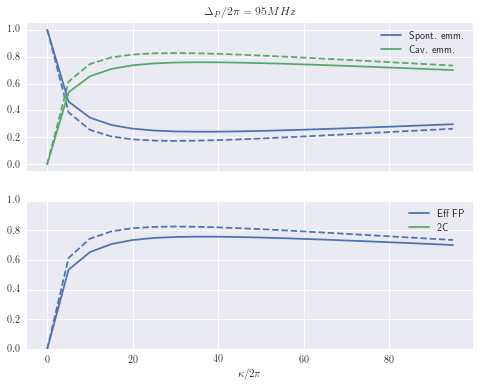

In [107]:
i=-1
plot(deltaPs[i])

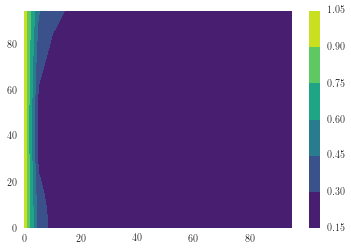

In [121]:
sp_ems_kappa_arr = np.array([x[0] for x in list(sp_em.values())])
sp_ems_deltaP_arr = np.array([list(sp_em.keys())]*len(sp_ems_kappa_arr.transpose())).transpose()
sp_ems_arr = np.array([x[1] for x in list(sp_em.values())])

fig, (ax) = plt.subplots(nrows=1)

im = plt.contourf(sp_ems_kappa_arr, sp_ems_deltaP_arr, sp_ems_arr, cmap=plt.get_cmap('viridis'))
fig.colorbar(im, ax=ax)

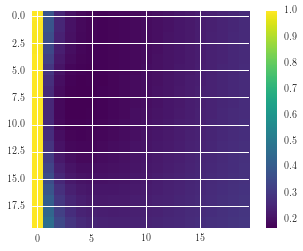

In [126]:
fig, (ax) = plt.subplots(nrows=1)
im = plt.imshow(sp_ems_arr, cmap='viridis', interpolation='nearest')
fig.colorbar(im, ax=ax)

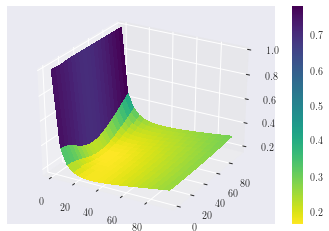

In [130]:
fig = plt.figure()
ax = fig.gca(projection='3d')

im = ax.plot_surface(sp_ems_kappa_arr, sp_ems_deltaP_arr, sp_ems_arr,  cmap='viridis_r', 
                       linewidth=0, antialiased=False)
fig.colorbar(im, ax=ax)

In [94]:
sp_ems_kappa_arr = np.array([x[0] for x in list(sp_em.values())])
sp_ems_deltaP_arr = np.array([list(sp_em.keys())]*len(sp_ems_kappa_arr.transpose())).transpose()
sp_ems_arr = np.array([x[1] for x in list(sp_em.values())])

print(sp_ems_deltaP_arr.shape,sp_ems_kappa_arr.shape,sp_ems_arr.shape)

(20, 8) (20, 8) (20, 8)


##### Initial observations

* The 'optimum' extraction enhancement seems to be at low $\kappa$ and with $\Delta_{P}{\approx}g$.
* Stronger coupling systems (i.e. higher $g$) seem to benefit more from birefringent enhancements.
* This is good as higher $g$ and lower $\kappa$ go hand-in-hand in the real world -- perhaps we should look to qunatuify this relationship next.

###Optimising extraction with $\kappa$

In [148]:
class CavityExtractionOptimisationProblem():
    
    psi0 = ['x',0]
    t_length = 1
    n_steps = 501
        
    def __init__(self, atom, cavity, laser_couplings, cavity_couplings):
        self.atom = atom
        self.cavity = cavity
        self.laser_couplings = laser_couplings
        self.cavity_couplings = cavity_couplings
        
    def fitness(self, x):
        kappa = x[0]
        self.cavity.kappa = kappa
        runner = ExperimentalRunner(self.atom,self.cavity,self.laser_couplings,self.cavity_couplings,verbose=False,reconfigurable_decay_rates=True)
        res = runner.run(self.psi0, self.t_length, self.n_steps)
        return [1-res.get_total_cavity_emission()] # pygmo requires fitness vectors
    
    def get_name(self):
        return "Cavity Extraction Optimisation Problem"
    
    def get_bounds(self):
        return ([0],[100*2*np.pi])

In [142]:
nl = pg.nlopt('cobyla')
nl.xtol_rel = 1E-6

algo = pg.algorithm(nl)
algo.set_verbosity(1)

atom4lvl = Atom4lvl(gamma=3*2*np.pi, configured_states=['x','gP','g'], sink_state='g')

results = []

for g in [3,5,15,30]:

    cav = Cavity(g=g*2*np.pi, kappa=0)
    
    cavity_coupling = CavityCoupling(g0=cav.g,
                                     g='gP', x='x',
                                     deltaC = 0 * 2*np.pi,
                                     deltaM=[1,-1],
                                     couple_off_resonance=False)
    
    prob = pg.problem(CavityExtractionOptimisationProblem(atom4lvl,cav,[],[cavity_coupling]))
    
    pop = pg.population(prob, 10)
    pop = algo.evolve(pop)
    
    results.append([g,pop])

In [143]:
for g, pop in results:
    print('For g/2{0}={1}MHz: maximum extraction at {2}/2{0}={3} of {4}%.'.format(pi_str,
                                                                             np.round(g,2),
                                                                             kappa_str,
                                                                             np.round(pop.champion_x[0] / (2*np.pi),2),
                                                                             np.round(100*(1-pop.champion_f[0]),2)))

For g/2π=3MHz: maximum extraction at κ/2π=3.0 of 25.0%.
For g/2π=5MHz: maximum extraction at κ/2π=5.0 of 39.06%.
For g/2π=15MHz: maximum extraction at κ/2π=15.04 of 69.44%.
For g/2π=30MHz: maximum extraction at κ/2π=29.65 of 82.61%.


(<matplotlib.figure.Figure at 0x130249c50>,
 <matplotlib.figure.Figure at 0x1312e8198>)

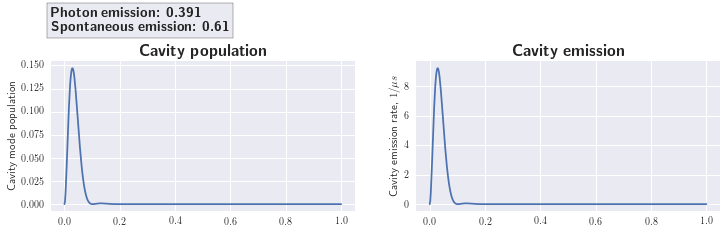

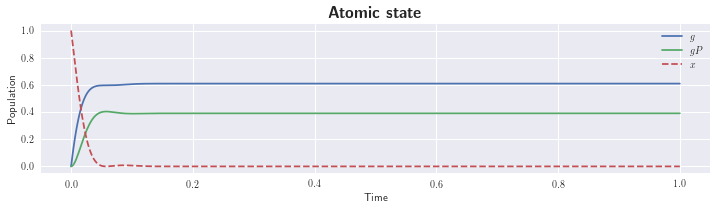

In [147]:
i_res = 1

g, pop = results[i_res]
kappa=pop.champion_x[0]

psi0 = ['x',0]
t_length = 1
n_steps = 501

atom4lvl = Atom4lvl(gamma=gamma, configured_states=['x','gP','g'], sink_state='g')

cav = Cavity(g=g*2*np.pi, kappa=kappa)
    
cavity_coupling = CavityCoupling(g0=cav.g,
                                 g='gP', x='x',
                                 deltaC = 0 * 2*np.pi,
                                 deltaM=[1,-1],
                                 couple_off_resonance=False)

runner = ExperimentalRunner(atom4lvl,cav,[],cavity_coupling,
                            verbose=False, reconfigurable_decay_rates=True)
res = runner.run(psi0, t_length, n_steps)

res.plot()

###Optimising extraction with $\kappa$ and $\Delta_P$

In [9]:
class CavityBirefExtractionOptimisationProblem():
    
    psi0 = ['x',0,0]
    t_length = 1
    n_steps = 201
        
    def __init__(self, atom, cavity, laser_couplings, cavity_couplings):
        self.atom = atom
        self.cavity = cavity
        self.laser_couplings = laser_couplings
        self.cavity_couplings = cavity_couplings
        
    def fitness(self, x):
        kappa, deltaP = x[0],x[1]
        self.cavity.kappa1 = kappa
        self.cavity.kappa2 = kappa
        self.cavity.deltaP = deltaP
        runner = ExperimentalRunner(self.atom,self.cavity,self.laser_couplings,self.cavity_couplings,verbose=False,reconfigurable_decay_rates=True)
        res = runner.run(self.psi0, self.t_length, self.n_steps)
        return [1-sum(res.get_total_cavity_emission(np.matrix([[1,0],[0,1]])))] # pygmo requires fitness vectors
    
    def get_name(self):
        return "Cavity Extraction Optimisation Problem"
    
    def get_bounds(self):
        return ([0]*2,[100*2*np.pi]*2)

In [11]:
nl = pg.nlopt('cobyla')
nl.xtol_rel = 1E-3

algo = pg.algorithm(nl)
algo.set_verbosity(1)

atom4lvl = Atom4lvl(gamma=3*2*np.pi, configured_states=['x','gP','g'], sink_state='g')

results = []

for g in [3,5,15,30]:

    cav = CavityBiref(g=g*2*np.pi,kappa1=0,kappa2=0,deltaP=0)
    
    cavity_coupling = CavityCoupling(g0=cav.g,
                                     g='gP', x='x',
                                     deltaC = 0 * 2*np.pi,
                                     deltaM=[1,-1],
                                     couple_off_resonance=False)
    
    prob = pg.problem(CavityBirefExtractionOptimisationProblem(atom4lvl,cav,[],[cavity_coupling]))
    
    pop = pg.population(prob, 10)
    pop = algo.evolve(pop)
    
    results.append([g,pop])